<a href="https://colab.research.google.com/github/mohdumarharis/Cheminformatics/blob/main/Dissertation_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second approach

In [ ]:
import pandas as pd

In [ ]:
molecule_fingerprints=pd.read_csv('descriptors_output.csv')

In [ ]:
molecule_fingerprints

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,AUTOGEN_molecule_1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AUTOGEN_molecule_3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AUTOGEN_molecule_4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AUTOGEN_molecule_5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AUTOGEN_molecule_6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26386,AUTOGEN_molecule_26388,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26387,AUTOGEN_molecule_26387,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26388,AUTOGEN_molecule_26389,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26389,AUTOGEN_molecule_26391,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
smiles_cancer=pd.read_csv('smiles_cancer.csv')

In [ ]:
x=molecule_fingerprints.drop(columns=['Name'])

In [ ]:
y=smiles_cancer['Anticancer']

In [ ]:
data = pd.concat([x, y], axis=1)
data.dropna(inplace=True)
x = data.drop(columns=['Anticancer'])
y = data['Anticancer']

In [ ]:
data.shape

(26381, 882)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Define the deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model using the resampled data
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
528/528 [==============================] - 5s 6ms/step - loss: 0.2131 - accuracy: 0.9529 - val_loss: 0.1991 - val_accuracy: 0.9505
Epoch 2/30
528/528 [==============================] - 3s 5ms/step - loss: 0.2002 - accuracy: 0.9534 - val_loss: 0.2007 - val_accuracy: 0.9505
Epoch 3/30
528/528 [==============================] - 4s 7ms/step - loss: 0.1936 - accuracy: 0.9534 - val_loss: 0.2025 - val_accuracy: 0.9505
Epoch 4/30
528/528 [==============================] - 3s 5ms/step - loss: 0.1930 - accuracy: 0.9534 - val_loss: 0.2025 - val_accuracy: 0.9505
Epoch 5/30
528/528 [==============================] - 3s 5ms/step - loss: 0.1897 - accuracy: 0.9534 - val_loss: 0.1994 - val_accuracy: 0.9505
Epoch 6/30
528/528 [==============================] - 3s 5ms/step - loss: 0.1878 - accuracy: 0.9534 - val_loss: 0.2020 - val_accuracy: 0.9505
Epoch 7/30
528/528 [==============================] - 3s 7ms/step - loss: 0.1836 - accuracy: 0.9534 - val_loss: 0.2043 - val_accuracy: 0.9505
Epoch 

In [ ]:
# Evaluate the model on the original test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

165/165 [==============================] - 0s 2ms/step - loss: 0.2748 - accuracy: 0.9494
Test accuracy: 0.9494030475616455


In [ ]:
# Make predictions
predictions = model.predict(X_test)

165/165 [==============================] - 0s 2ms/step


In [ ]:
# Convert predictions to binary classes (0 or 1)
predicted_classes = np.round(predictions)


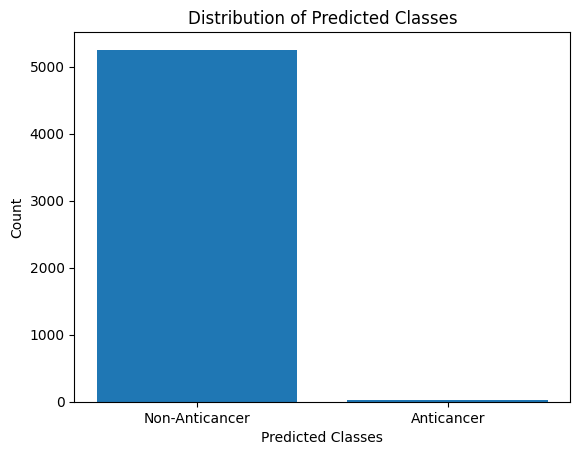

In [ ]:
import matplotlib.pyplot as plt

# Plot a bar graph showing the distribution of predicted classes
unique_classes, class_counts = np.unique(predicted_classes, return_counts=True)


plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes, ['Non-Anticancer', 'Anticancer'])
plt.xlabel('Predicted Classes')
plt.ylabel('Count')
plt.title('Distribution of Predicted Classes')
plt.show()

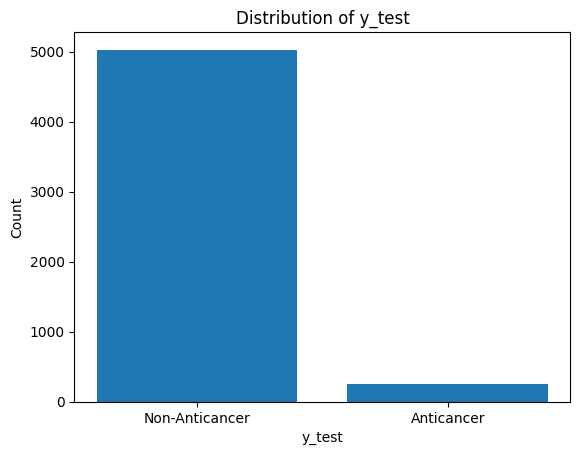

In [ ]:
import matplotlib.pyplot as plt

# Plot a bar graph showing the distribution of predicted classes
unique_classes, class_counts = np.unique(y_test, return_counts=True)


plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes, ['Non-Anticancer', 'Anticancer'])
plt.xlabel('y_test')
plt.ylabel('Count')
plt.title('Distribution of y_test')
plt.show()

In [ ]:
# Assess performance metrics (e.g., accuracy, precision, recall, F1-score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

In [ ]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Accuracy: 0.9494030699260944
Precision: 0.08695652173913043
Recall: 0.008064516129032258
F1-Score: 0.014760147601476016


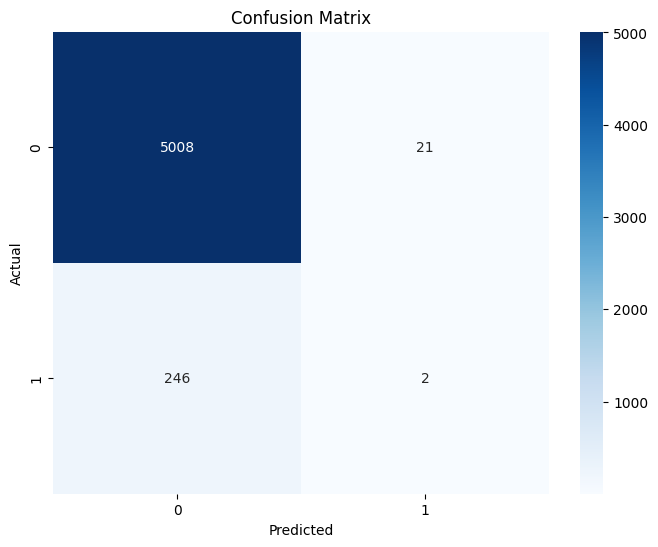

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

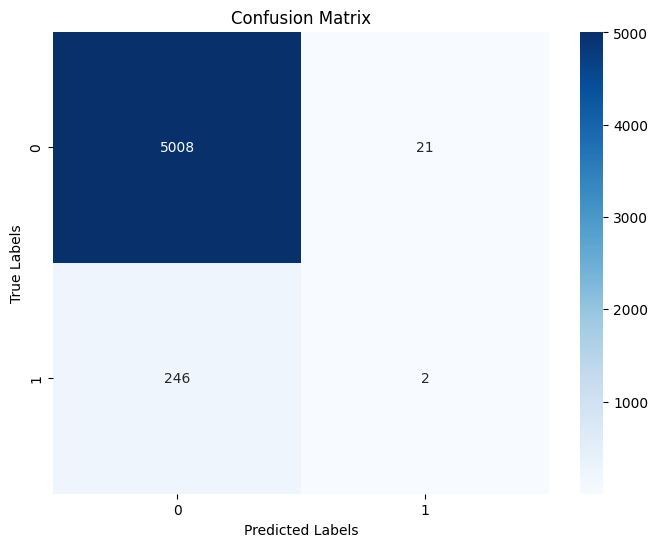

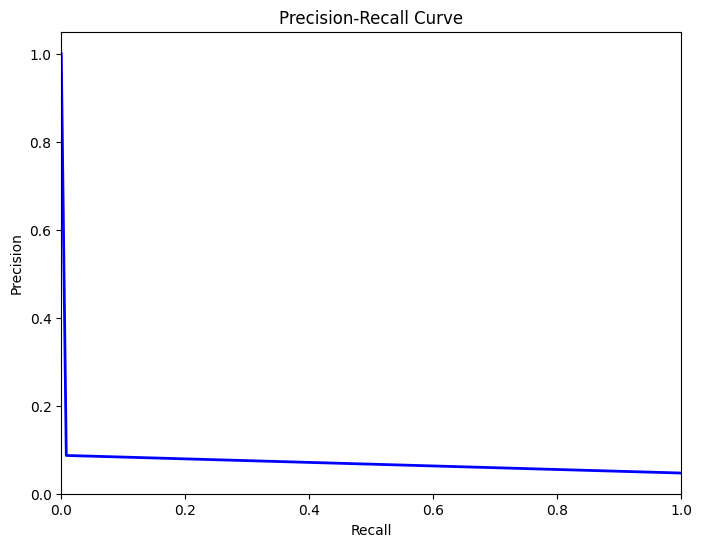

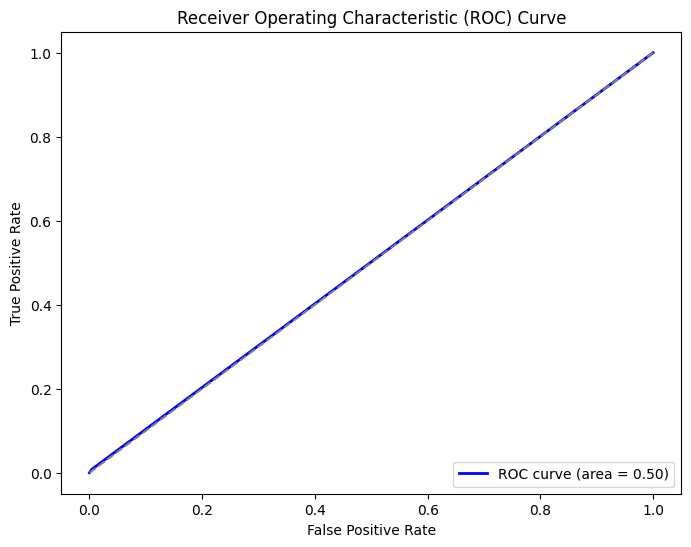

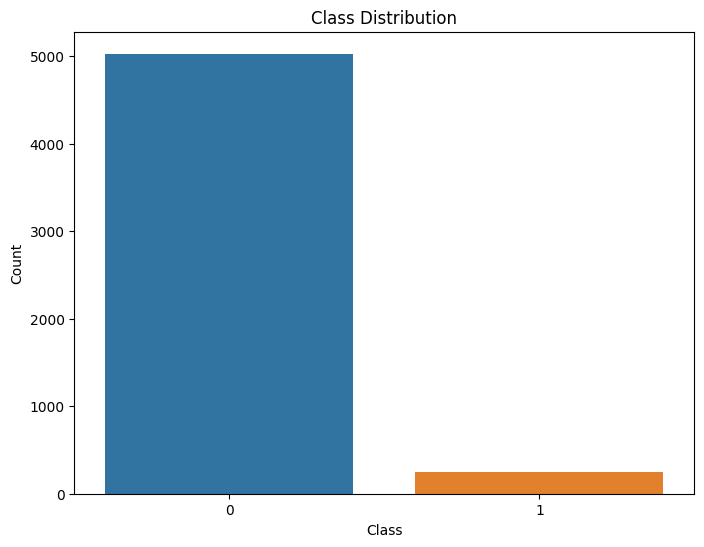

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
import seaborn as sns

# # Example data (replace with your actual data)
# y_true = np.random.randint(2, size=880)
# y_scores = np.random.rand(880)

y_test_model1 = y_test
predicted_classes_model1 =predicted_classes
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()

# ROC Curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Class Distribution
def plot_class_distribution(y_true):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y_true)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()

# Example usage
plot_confusion_matrix(y_test_model1, predicted_classes_model1)
plot_precision_recall_curve(y_test_model1, predicted_classes_model1)
plot_roc_curve(y_test_model1, predicted_classes_model1)
plot_class_distribution(y_test_model1)


# Another Approach

In [ ]:
# Define the neural network model 2
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with class weights
class_weight = {0: 1, 1: 25148 / 1243}
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,validation_split=0.2, class_weight=class_weight)

Epoch 1/20
528/528 [==============================] - 5s 7ms/step - loss: 1.4147 - accuracy: 0.5187 - val_loss: 0.6689 - val_accuracy: 0.6797
Epoch 2/20
528/528 [==============================] - 3s 6ms/step - loss: 1.3480 - accuracy: 0.4602 - val_loss: 0.7206 - val_accuracy: 0.0742
Epoch 3/20
528/528 [==============================] - 3s 5ms/step - loss: 1.3200 - accuracy: 0.4193 - val_loss: 0.6612 - val_accuracy: 0.4319
Epoch 4/20
528/528 [==============================] - 3s 5ms/step - loss: 1.3113 - accuracy: 0.3932 - val_loss: 0.7065 - val_accuracy: 0.2589
Epoch 5/20
528/528 [==============================] - 4s 7ms/step - loss: 1.3216 - accuracy: 0.3810 - val_loss: 0.6954 - val_accuracy: 0.2341
Epoch 6/20
528/528 [==============================] - 3s 5ms/step - loss: 1.3124 - accuracy: 0.3939 - val_loss: 0.7034 - val_accuracy: 0.1343
Epoch 7/20
528/528 [==============================] - 3s 5ms/step - loss: 1.3094 - accuracy: 0.2953 - val_loss: 0.7116 - val_accuracy: 0.2518
Epoch 

In [ ]:
# Evaluate the model on the original test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

165/165 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.1586
Test accuracy: 0.15861284732818604


In [ ]:
# Make predictions
predictions = model.predict(X_test)

165/165 [==============================] - 0s 2ms/step


In [ ]:
# Convert predictions to binary classes (0 or 1)
predicted_classes = np.round(predictions)

In [ ]:
# Assess performance metrics (e.g., accuracy, precision, recall, F1-score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

In [ ]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Accuracy: 0.1586128482092098
Precision: 0.04710458081244598
Recall: 0.8790322580645161
F1-Score: 0.08941755537325677


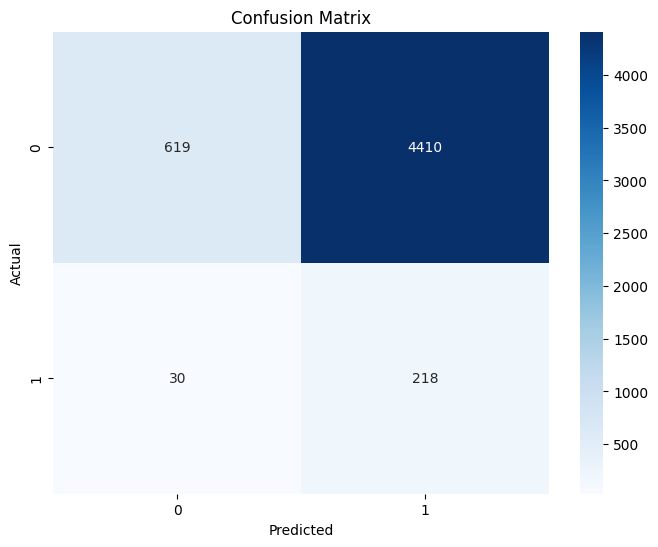

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

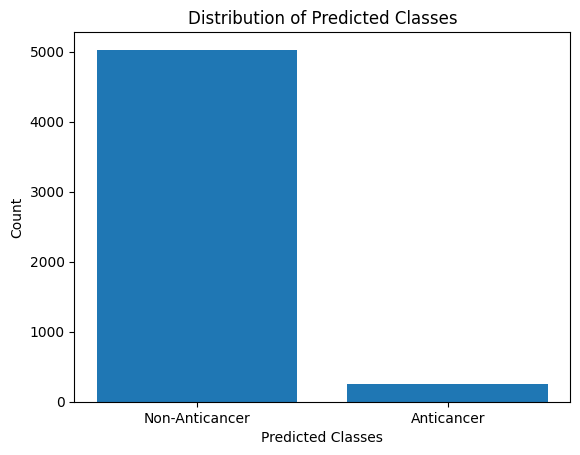

In [ ]:
plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes, ['Non-Anticancer', 'Anticancer'])
plt.xlabel('Predicted Classes')
plt.ylabel('Count')
plt.title('Distribution of Predicted Classes')
plt.show()

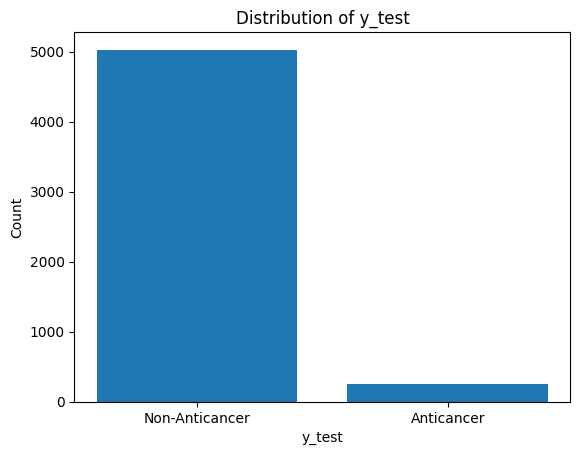

In [ ]:
import matplotlib.pyplot as plt

# Plot a bar graph showing the distribution of predicted classes
unique_classes, class_counts = np.unique(y_test, return_counts=True)


plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes, ['Non-Anticancer', 'Anticancer'])
plt.xlabel('y_test')
plt.ylabel('Count')
plt.title('Distribution of y_test')
plt.show()

# Applying other methods

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions
logreg_predictions = logreg_model.predict(X_test)


In [ ]:
logreg_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
logreg_predicted_classes = np.round(logreg_predictions)

In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()

evaluate_model(y_test, logreg_predicted_classes, "Logistic Regression")
#evaluate_model(y_test, linear_predicted_classes, "Linear Regression")



Metrics for Logistic Regression:
Accuracy: 0.9528
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()

evaluate_model(y_test, rf_predictions, "Random Forest")

Metrics for Random Forest:
Accuracy: 0.9426
Precision: 0.0896
Recall: 0.0242
F1-Score: 0.0381



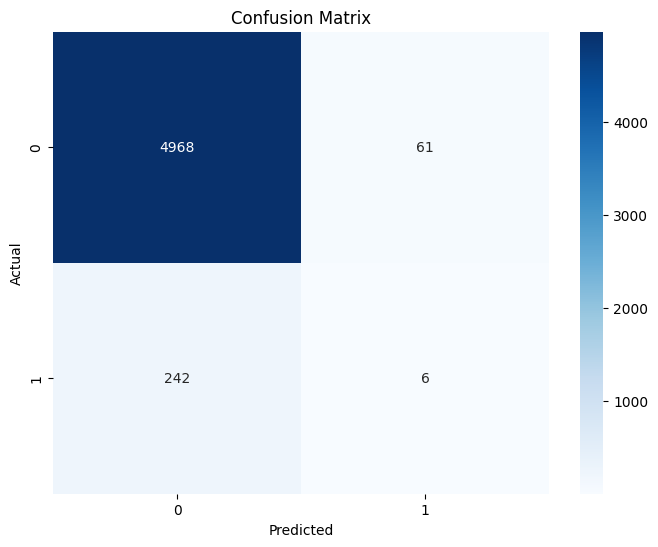

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# CNN APPROACH